## Assignment template 1) Simulating the Gosper Glider Gun

This assignment follows on from 'Practical 4. Modules and Functions - Building Conway's Game of Life'. The main objective is:

<div class="alert alert-block alert-success">
<b> Simulate the Gosper Glider gun from Conway's game of life </b> 
  
Overview: You are tasked with:

 - 1. Simulating the Gosper Glider gun from Conway's game of life
 - 2. Introducing a 'spaceship' specie into the simulation and 'assessing' the disruption.
 
The first task requires you to initialise the 2D Universe of Conway's game of life and run the simulation. The second task is a little subjective but requires you to place a spaceship into the 2D Universe and draw some personal observations about the change in repetitive nature of the Gosper Glider Gun scenario. Based on the example given in class, we can break this exercise down into a number of steps:

 - Initialise a 2D 'Universe' which we will run our simulation over.
 - Define the shape and location of species for the Gosper Glider Gun simulation.
 - Introduce a new specie into the simulation.
 - Consider a time of simulation.
 
<div class="alert alert-block alert-warning">
<b>Please note:</b> 

We will discuss this in class, but aside from a working notebook we are also looking for the following:

 - An associated narrative with each operation. This includes the following sections:
 
 > Abstract
  - Summarise the project and main results
 
 > Introduction and methdology
  - What is the challenge and how are you solving it?
  - What modules/functions are you using?
  
 > Results
  - What is happening in each figure and/or your simulation?
  
 We also want to see adequate referencing around:
  - What is the original source of the theory and/or data?
  - Comments in the code boxes using the # symbol. Remember that someone might not know what each line of code does.

You may also want to consider a broader discussion around this challenge. For example: 
 - What could your software be improved? 
 - How do you know your results are correct? 
 - What if someone wanted to get in touch with you and re-use this code? Any restrictions on data?

To start, we recommend you first get the code implementation working and then construct the narrative around it. Also please note that to add another code or markdown box, you can simple use the 'Insert' option on the main menu.

Your Gosper Glider Gun simulation should resemble the following figure, before you add a 'spaceship':

<tr>
    <td> <img src="images/Assessment1_output.png" alt="Drawing" style="width: 400px;"/> </td>
</tr>
  
</div>

</div>

## Abstract 


The late John Conway's Game of life is a cellular automation('not technically a game') that is played on a 2d grid known as a 'Universe'(Conway game of life.com). This Universe consists of many tiny squares known as cells which can exist in two states, alive or dead. One particular application of this game is to plot collections of cells known as species, which all have their own unique shape, and see how the rules programmed into the game like to change these shapes.

As a result, one large field of research where this game can be applied is microbiology, to look at how different cells could interact with each other. For example, the game has been used to investiage the epigenetic principle, which states that the genetic properties of an individual are closely related to how it will develop( “Game of Life” and the Epigenetic Principle, Caballero et al, 2016). The game also helps explore the evolution of ecological communities. All of these applications make this game John Conways most popular work, his magnum opus. This actually led to him despising the game for many years of his life, as his other works in the field of Mathematics, while important, were drastically overshadowed by a comparitivley simple game which he did not want to stake his legacy on.

Here we fire a series of 'Gliders' wich originate from Gosper's Glider Gun, into a spaceship called the Light Weight Space Shipe(LWSS), and the result is a series of oscilators followed by lots of debris around the board












## Introduction



The rules of life are as follows:
 - Any live cell with fewer than two live neighbours dies (referred to as underpopulation).(R1)
 - Any live cell with more than three live neighbours dies (referred to as overpopulation).(R2)
 - Any live cell with two or three live neighbours lives, unchanged, to the next generation.(R3)
 - Any dead cell with exactly three live neighbours comes to life.(R4)



In our simulation we will look at a species called Gosper's Glider Gun, and how the rules of the game affect it. We will then introduce another species into the 2d space known as the 'LWSS', which oscillates around a central point without changing position on the grid, and look at how these two interact. the Gun tends to generate a stream of cells in a SE direction, which come into contact with the Beacon and cause an explosion of some sorts. 



In this report, we will plot both species, implement the rules of the life and then run our simulation, and attempt to explain why the species interact in the manner that they do. We also want to see how the overall 2d space changes over time, involving many iterations.



In [ ]:
#This code will help to visualise the four rules, the furst of
#It is imperative to run this code fisrt to ensure that we import all the libraries, othewise we wont have the capability to plot anything
import numpy as np #import the numerical python library, numpy(Can do mathematical functions). Changing the referenced library to 'np' is solely for convenience
import matplotlib.pyplot as plt #as per the above, much easier to write over and over again 
from IPython.display import clear_output
import time#we then import the relevant submodules for our experiment


R1_1 = np.zeros((5,5),dtype=int)#defines an empty array in which we can plot live(black) cells
R1_2 = np.zeros((5,5),dtype=int)#another empty array which we can use to show what happens after the rules are applied for one generation
R1_1[1,1] = 1
R1_1[2,2] = 1#plots where we have our black squares, everything not plotted is assumed to be a 0, which appear white or background colour



plt.subplot(1, 2, 2).imshow(R1_1, cmap='binary') #The cmap, or colour map, gives us a black and white board to visualise our array using matplotlib
plt.title('R1(Before)')#givs a title to our subplot
plt.show()

plt.subplot(1, 2, 2).imshow(R1_2, cmap='binary') #Now we repeat the same thing for the 'after' array
plt.title('R1(After)')
plt.show()



In [ ]:
#Here we will plot R2 by the same code

R2_1 = np.zeros((5,5),dtype=int)
R2_2 = np.zeros((5,5),dtype=int)

R2_1[1,1] = 1
R2_1[2,1] = 1
R2_1[1,2] = 1
R2_1[1,3] = 1
R2_1[2,2] = 1

plt.subplot(1, 2, 2).imshow(R2_1, cmap='binary') #The cmap, or colour map, gives us a black and white board.
plt.title('R2(Before)')#givs a title to our subplot
plt.show()

R2_2[1,1] = 1
R2_2[2,1] = 1
R2_2[1,2] = 1
R2_2[1,3] = 1
plt.subplot(1, 2, 2).imshow(R2_2, cmap='binary') #The cmap, or colour map, gives us a black and white board.
plt.title('R2(After)')#givs a title to our subplot
plt.show()
#It is important to note that this is not how the entire grid would change, the rules have only been applied to [2,2], for the sake of showing the rules

In [ ]:
#Now R3
R3_1 = np.zeros((5,5),dtype=int)
R3_2 = np.zeros((5,5),dtype=int)

R3_1[1,1] = 1
R3_1[2,2] = 1
R3_1[3,2] = 1
plt.subplot(1, 2, 2).imshow(R3_1, cmap='binary') #The cmap, or colour map, gives us a black and white board.
plt.title('R3(Before)')#givs a title to our subplot
plt.show()

R3_2[2,1] = 1
R3_2[2,2] = 1
plt.subplot(1, 2, 2).imshow(R3_2, cmap='binary') #The cmap, or colour map, gives us a black and white board.
plt.title('R3(After)')#givs a title to our subplot
plt.show()

In [ ]:
#And now R4
R4_1 = np.zeros((5,5),dtype=int)
R4_2 = np.zeros((5,5),dtype=int)

R4_1[1,1] = 1
R4_1[2,1] = 1
R4_1[3,3] = 1
plt.subplot(1, 2, 2).imshow(R4_1, cmap='binary') #The cmap, or colour map, gives us a black and white board.
plt.title('R4(Before)')#givs a title to our subplot
plt.show()

R4_2[2,2] = 1
plt.subplot(1, 2, 2).imshow(R4_2, cmap='binary') #The cmap, or colour map, gives us a black and white board.
plt.title('R4(After)')#givs a title to our subplot
plt.show()

## Methodology


One of the main libraries used is numpy, meaining numperical python. This allows us to perform all the mathematical funcitons such as generating empty arrays, assinging them values. Without numpy, we would not be able to have any species.
Matplotlib is used to plot all of our data calculated, allowing us to visualise the game of life and all the required outputs. We import these modules in shorthand form such as np for numpy, to prevent us wrting long lines of code repeatdely, streamlining the whole processs.

Ipython.display imports the clear_output sub module. This allows us to have loads of subsequent outputs in one universe. This means that we can clear all the output of the current generation before we go on to the next generation, to ensure a smooth iteration of generations. 

We use a function and conditional statments to implement the rules of the game into our universe
The function makes our code more streamlined, as we only have to call the one line of code whenever we want to implement our rules into the numerous outputs in this notebook. Our function body uses two for loops to seach each cell in the universe in question, then two more to find all the nieghbours of the cell in quesetion. From there, it uses conditional statements to check for the number of neighbouring cells and from these decides which rule to apply, so we can produce the next gernetation of cells. All of this can be called in one line of code in a function.

Conditional statements such as if statements, require a condition to be met, and depending if this conditoin is met, a different outuput is achieved. Elif statments can be incoorporated into these, as we have done here, for to create a layered if statement. For example, we first want to check if a cell is alive or dead using a conditional, and depending on this result, more conditoinal statements should be applied to determine what should happen based on the neighbourin cells. We can use different contitional statemtns to determing what happens to the cell depending on the number of neighbouring cells from here

In [ ]:
#### -------- INSERT CODE HERE ----------

Gun = np.zeros((9,39),dtype = int)#this generates an empty array that is 9 rows by 39 columns, and dtype allows us to assign a value, which in this case, is a whole number, to this variable, initally these are all a 0, implying a dead cell

Gun[4,0]=1
Gun[5,0]=1
Gun[4,1]=1
Gun[5,1]=1
Gun[4,10]=1
Gun[5,10]=1
Gun[6,10]=1
Gun[3,11]=1
Gun[7,11]=1
Gun[2,12]=1
Gun[8,12]=1
Gun[2,13]=1
Gun[8,13]=1
Gun[5,14]=1
Gun[3,15]=1
Gun[7,15]=1
Gun[4,16]=1
Gun[5,16]=1
Gun[6,16]=1
Gun[5,17]=1
Gun[2,20]=1
Gun[3,20]=1
Gun[4,20]=1
Gun[2,21]=1
Gun[3,21]=1
Gun[4,21]=1
Gun[1,22]=1
Gun[5,22]=1
Gun[0,24]=1
Gun[1,24]=1
Gun[5,24]=1
Gun[6,24]=1
Gun[2,35]=1
Gun[2,34]=1
Gun[3,34]=1
Gun[3,35]=1# all of this code helps us plot the gun, we have specified the particular cells  in our array that we want to be coloured, indicated by a 1
# numpy watns us to plot by column first, then row, conterintuituive to what is normally done, so all co-ordinates in the code(not the one in the explanations) will be in this fashion



Universe=np.zeros((50,50),dtype=int)# initialises another 2D array: 50 by 50 'Universe', which is initially covered in 0's, which represnets 2500 empty cells covered by the number 0, and the only datatype that can be inputed is in an integer, floats have no impact
#print(Universe)#then prints this universe. This has to be bigger than our 'Gun' array, so the gun can actually fit in the glider. Not figuring this out gave me a great deal of errors and grief.

Universe[0:9,0:39] = Gun#tells us where to plot 'Gun' within 'Universe', by assigning it a subplot of a square, which is 9 down and 39 cells across originiting at the top left corner (IS IT 50 by 50 THO)


#the function 'search each cell adds the rules of life into our games, this is much quicker than plotting each subsequent generation, as we have done when displaying the rules
def search_each_cell(total_rows,total_cols,space):#this function takes in 3 variables, the number of rows, the number of columns and the entire space
    new_space = np.zeros((total_rows,total_cols),dtype=int)#means that the next generation will be the binary represnetaion of the 4 rules applied to all the columns and rows here, our 'game'
    # 1) We will use two nested for loops to go through each cell in our universe
    for row in range(total_rows):#loop 1, going through the rows
        for col in range(total_cols):#loop 2, stopping at eah row, going through all the columns in that row, eventually covering each cell in our universe
            # 'row' and 'col' define the cell we are currently in, but for our rules, we need to look at every cell that neighbours ours, to see if it will die, come alive or stay alive based on the activity of these cells
            #to do this we wil use two more nested for loops, within each cell, we need to count the number of neighbouring 1's, and we need a variable to save the number of surroinding 1's aswell, which is set to 0 currently
            count = 0
            for row2 in range(row-1,row+2): # See here that we can define a start and end to our 'range'
                for col2 in range(col-1,col+2): #this loop is telling us what neighbouring cells to look in
                     # We need to check if our new position, defined by [row2,col2] is off the board
                    if (row2<0) or (row2>=total_rows) or (col<0) or (col2>=total_cols):
                        pass # this tells the computer, that if our new position is outside the Universe, do nothing
                    elif row2 == row and col2 == col:
                        pass#meaning if the cell we are searching in the neighbourhood is the cell we are currently in, do nothing, we want to investigate the surroinding cells
                    # If we haven't left the universe, and we are in a cell we want to investigate
                    # check if this new space has a value of 1, otherwise leave it alone, but if it does have a 1, add this to the empty value count
                    else:
                        if space[row2,col2]>0:#if the space has a value greater than 0, (so a 1) add 1 to the value of count
                            count=count+1
            # Now we implement conditional statements which tell us what do based on the value of cont
            # Read through the narrative provided above and remember to obey the spacing rules 
            if space[row,col] > 0:# if our current cell is alive(has a value of 1 assigned to it)
                if count < 2:
                    new_space[row,col] = 0;# if there are less than two neighbours with a value of 1, the cell dies (R1)
                elif 2<=count<=3:# if the number of neighbouring live cells (those with a 1 in them), is equal to 2 or 3...
                    new_space[row,col] = 1;#the cell lives# elif allows for more than one conditional to be inspected at a time, so we an look at if it doesn't fall under rule 1, does it fall under rule 2 and if not, will ir qualify for rule 3 to be applied to it?, making if statments much more versatile
                elif count > 3:#if there are more than 3 live surrounding neighbours...
                    new_space[row,col] = 0;# the cell should die
            elif space[row,col] == 0:# if our current cell is dead(has a value of 0 assigned to it)
                if count == 3:#if it has exactly 3 live cells next to it
                    new_space[row,col] = 1;  #the cell in the next generatino should be alive                  
    
    return new_space#returns a new space, with the entire functions applied (the next generation)

    


for x in range(100):# we then iterate through 100 generations, calling this function 100 times. I am only doing this 100 times due to the extremeley limited capability of my laptop, but of course this value can be changed
    clear_output(wait=True)#clears out the universe before iterating the next time step, so we can use the same universe for all our generations
    Universe_new = search_each_cell(50,50,Universe)#calculates the next time step by applying the four rules to our current time step
    Universe = Universe_new#this then chages what the current universe is to the calculated time step in the future, iterating through the generations
    plt.imshow(Universe_new, cmap='cool')
    plt.title('Universe simulation[with dynamic Gun]')#gives us the title of our plot
    plt.show()
    time.sleep(0.01)#this number is associated with the time of pause between each time step, and the lower it is, the smoother our simulation runs


            
    

### The Gosper Glider Gun
Above we have plotted the famous Glider Gun.Initially John Conway and his team potted a body called the R pentomino, which afer a few generations, produces lots of identical bodies of debris, which were then all called new species (Game of Life: Gosper glider gun, Alex Bellos, 2014)
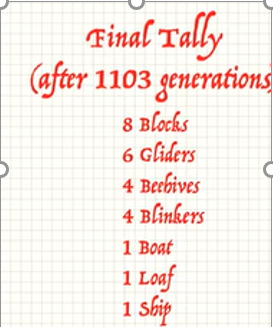 (Bellos)

The appearance of the glider species sparked Conway's curiosity. He then put out a (£50) reward for anyone who could produce a 'Gun' of Gliders. This challenge was taken up by another Mathematician named Bill Gosper. He first found this right pointing arrowhead...(Bellos)
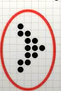 (Game of Life: Gosper glider gun, Alex Bellos)
...which after 15 generations endded up pointing to the left as seen below.
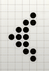 (Bellos)
Gosper also noticed that as the triagnle moves to the right, it creates a species called a beehive (Bellos)
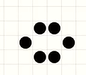 (Bellos)
The arrow then moves back to the left and does the same thing, giving this species the name queen bee.

Unforntunatley, when it moves back to the right, the beehive on the right then destroys it, and then it eventually stabilises, but only many generations later. (Bellos)

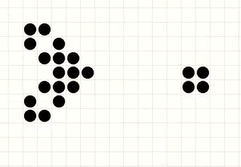 (Bellos)
To try and prevent the beehive from destroying the gun, Gosper put a block on the right. The queen bee comes up, deposits it’s beehive, which is then destroyed by the block , and the block is preserved. Then the beehive on the left then destroys the queenbee.(Bellos)

If we have block either side, the arrow moves to either side, and the beehive gets destroyed and replaced by a block. This is called the queen bee shuttle. This is a period 30 oscillator, meaing it oscillates around a point, returningn to it's origninal state after 30 generations.(Bellos)

Gosper's next stroke of genius was to point two queen bee shutters at each other
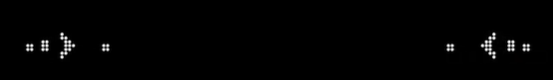 (Bellos)

The one on the left you remove the block on the right and the one on the right you remove the block on the left, so that they could interact. The iteration was the interference would bounce them off each other. This happens if one is produced just above the other, as seen below.
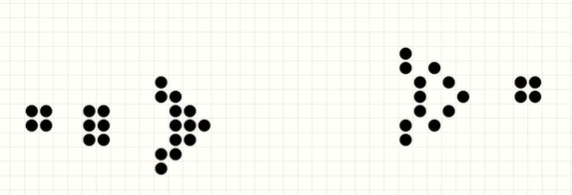 (Bellos)

Here the queen bees approach each other, bounce off each other, leaving a debris of live cells, which turns into the first formation of a glider. And the beehives move back and forth from each other, continually creating this debris. (So more and more gliders). The glider is one of the most well known and reseached species in the whole of the game.


#### How does the Glider work?

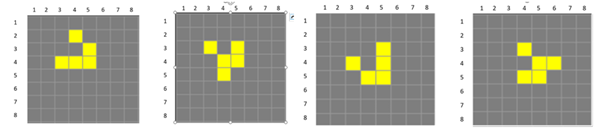
The glider is a 3x3 array that makes one downward vertical movement, changes shape and then moves horizontally to the right, resulting in an overall diagonal movement across the 2d space.

To create the downward vertical movement, the cell in (4,2) dies (R1). The cells in (5,3) and (5,4) live on to the next generation(R3), as they both have 2 or 3 live neighbours. Cell (4,5) wakes up by R4 as it surrounded by (3,4), (4,4) and (5,4). Cell (3,4) dies by R1, and cell (3,3) wakes up by R4. This produces the second shell in this series.

To create the change in shape, (3,3) dies by R1, and (4,4) dies by overpopulation(R2). Cells (5,3), (5,4) and (4,5) all proceed to the next generation as they all have two live neighbours(R3). Cells (5,5) and (3,4) come to life by R4. This produces the third shape in the generation.

To get the horizontal movement by one cell, (6,4) comes to life, being neighbours with (5,3), (5,4) and (5,5). (4,3) also comes to life in the same way. Cell (5,3) dies by underpopulation, as well as (3,4 by the same mechanism.

Speed refers to how many cells have been displaced by one period. The period is how many generations a spaceship takes to reappear in it’s original form. “For spaceships that move diagonally, speed is defined the same as above, but where "the number of cells that is has been displaced by refers to the maximum of the x or y displacement; not their sum. So, for example, a glider has a speed of c/4, since it takes 4 generations to move one cell in the x direction and one cell in the y direction.” (Life Wiki)


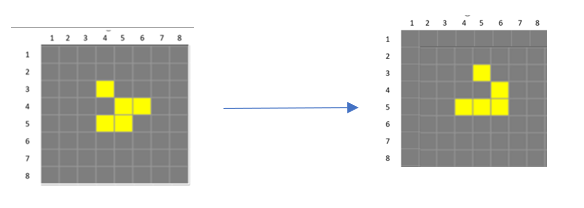

The glider then changes shape back into it’s first generation. (6,5) comes to life, as does (5,3), while (4,3) dies by underpopulation and (5,4) comes dies by overpopulation, and the glider continues iterating through generations until it reaches a wall of the universe, at which point all the cells die.


Now that we have produced our Glider Gun, we will go on to create a spaceship to intefere with the Gun's functionality.


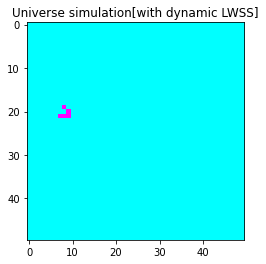

In [6]:
#This allows us to introduce a new species, which interups how the glider gun operates
#Initialise the LWSS matrix(LWSS is our spaceship)
LWSS = np.zeros((19,15),dtype=int)#opens another 2d array
#Enter values for '1' where you would like a black square in our subplot


LWSS [1,2]=1
LWSS [1,5]=1
LWSS [2,1]=1
LWSS [3,1]=1
LWSS [4,1]=1#in our new 2d array, we plot where the live cells go
LWSS [4,2]=1
LWSS [4,3]=1
LWSS [4,4]=1
LWSS [3,5]=1

LWSS_map=np.zeros((50,50),dtype=int)# plots a new large map, the same size as our universe
LWSS_map[10:29,34:49] = LWSS#we then produce a subplot for LWSS in our LWSS_map As this array starts at (10,34): putting a live cell in the first square downwards of this subplot will plot it in the 11th square downdward of the Universe


for x in range(100):
    clear_output(wait=True) 
    LWSS_map_new = search_each_cell(50,50,LWSS_map)#calculates the follwing time step by applying the four rules to our current time step
    LWSS_map = LWSS_map_new#this then chages what the current universe is to the calculated time step in the future, iterating through the generations
    plt.imshow(LWSS_map_new, cmap='cool')
    plt.title('Universe simulation[with dynamic LWSS]')#gives us the title of our plot
    plt.show()
    time.sleep(0.01)# we again apply our for rules of life to this function


##### What is the LWSS?
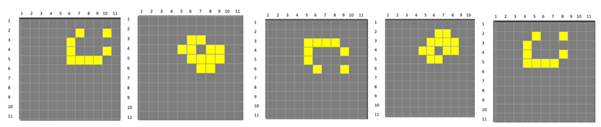(These images were made by myself using microsoft word and the outputs of Play game of Life.com)

The Lightweight Spaceship (LWSS) is 5x4 array that moves only moves horizontally to the left. It’s first movement to the left and down into a conduit, then changes shape into a flipped spaceships, then back up one square and one square to the left into a flipped conduit, and then changes shape back into its initial form. It is the smallest orthogonal(involving right angles) spaceship. (lifewiki)

The LWSS has a speed of “c/2 and has period 4”. This is because it takes 4 generations to return to its original state as seen above. And moves 2 cells to the right over the course of this period.(LifeWiki - Speed)

To create the initial movement, (7,2),(10,2) and (10,4) die by underpopulation and (5,4) comes to life by having 3 neighbours to the right. (7,3), (9,4) and (8,4) also come to life. (8,6) and (7,6) also come to life all by having 3 neighbours. The cells making the main L shape going from (6,3) to (9,5) are all preserved. 

A change in shape can then be observed to a LWSS that has been flipped along the X-axis. (7,6) and (8,6) both die by overpopulation and (6,6) and (9,6) come to life by having, both having two live neighbours. The L shape is now disrupted, as (9,5), (8,5), (7,5) and (6,5) all die out by overpopulation but (5,5) springs to life, having 3 live neighbours. (5,4) remains alive, having 3 live neighbours, (6,4) dies by overpopulation as does (8,4), but (9,4) has 3 live neighbours, so it lives on. (6,3) and (7,3) also continue to live on, but (5,3) and (8,3) both have exactly 3 live neighbours, so they come to life. 

Then we move one square up and to the left. (6,2) and (7,2) both have 3 live neighbours on the row below, so they become alive. (5,3), (6,3), (7,3) and (8,3) are all perfectly preserved as all cells here have two or 3 live neighbours. (5,3) and (5,5). (4,4) comes to life, giving us our movement when coupled with the death of (9,4) and (9,6) by underpopulation. (5,4) remains alive and (7,4) and (8,4) spring to life, having enough neighbours. (5,5) remains alive and (6,5) comes alive having 2 live neighbours. Everything on the 6th row dies by underpopulation.

The final change in shape completes our period. (5,2) and (8,2) come to life, having enough live neighbours to do so. (4,3) comes to life by the same mechanism, and everything else on the 4th row dies by overpopulation. (4,4) remains alive, with every cell on this row apart from (8,4) dead by overpopulation, as (8,4) has 3 live neighbours and no more. (5,5) and (6,5) stay alive, gaining live cells on either side (4,5) and (7,5) as these cells have 3 neighbours.

When LWSS hits the boreder or the universe, it bounces back and turns into a glider, heading the same way as the rest of the gliders.

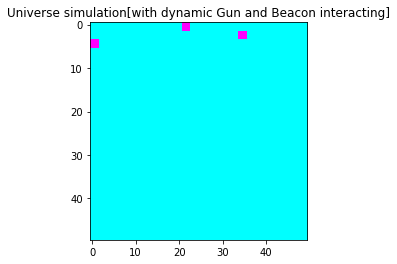

In [7]:
Universe=np.zeros((50,50),dtype=int)# initialises another 2D array: 50 by 50 'Universe', which is initially covered in 0's, which represnets 2500 empty cells covered by the number 0, and the only datatype that can be inputed is in an integer, floats have no impact
#print(Universe)#then prints this universe. This has to be bigger than our 'Gun' array, so the gun can actually fit in the glider. Not figuring this out gave me a great deal of errors and grief.

Universe[0:9,0:39] = Gun#tells us where to plot 'Gun' within 'Universe', by assigning it a subplot of a square, which is 9 down and 39 cells across originiting at the top left corner (IS IT 50 by 50 THO)
Universe[10:29,34:49] = LWSS#This imports our LWSS into the same universe as Gun, we produce another subplot for LWss to go on, which can't overlap with our gun, otherwise the gun will not be produced, only the LWSS. 
  

for x in range(100):
    clear_output(wait=True)#
    Universe_new = search_each_cell(50,50,Universe)#calculates the follwing time step by applying the four rules to our current time step
    Universe = Universe_new#this then chages what the current universe is to the calculated time step in the future, iterating through the generations
    plt.imshow(Universe_new, cmap='cool')
    plt.title('Universe simulation[with dynamic Gun and Beacon interacting]')#gives us the title of our plot
    plt.show()
    time.sleep(0.01)

Here we have the collision of the LWSS and the first glider that gets made. This produces a series of oscilators from the debris of this collision, and after produces a series of oscilators in a snowflake pattern. The upward branch of the oscillator destroys a beehive, and then this goes onproduces a chain reaction which destroys the whole Glider Gun. The disrupted beehive on the right turns into a mass of debris which then moves on to the left beehive, destroying the whole gun.This means no more gliders can be produced. Due to this, no more gliders are proeduced and the oscillators become the main part 

In [ ]:
#Here I am also going to plot my own species , which i will nome Poseiodon. This test was just to see what happended when a randon arrangement of cells collides and all the species produced from it

Pse = np.zeros((100,100),dtype = int)
#pseudo period gun
Pse[14,6] = 1
Pse[14,7] = 1
Pse[15,7] = 1
Pse[16,7] = 1
Pse[17,8] = 1
Pse[17,9] = 1
Pse[16,9] = 1
Pse[37,8] = 1
Pse[36,9] = 1
Pse[35,10] = 1
Pse[34,11] = 1
Pse[36,11] = 1
Pse[37,10] = 1
Pse[38,9] = 1
Pse[39,9] = 1
Pse[40,9] = 1
Pse[41,9] = 1
Pse[41,10] = 1
Pse[40,10] = 1
Pse[39,10] = 1
Pse[35,12] = 1
Pse[35,13] = 1
Pse[35,14] = 1
Pse[35,15] = 1
Pse[36,15] = 1
Pse[36,14] = 1
Pse[19,44] = 1
Pse[19,45] = 1
Pse[36,13] = 1
Pse[20,44] = 1
Pse[20,46] = 1
Pse[21,45] = 1
Pse[21,46] = 1
Pse[21,47] = 1
Pse[22,46] = 1
Pse[22,47] = 1
Pse[23,44] = 1
Pse[23,46] = 1
Pse[44,21] = 1
Pse[44,22] = 1
Pse[44,39] = 1
Pse[4,40] = 1
Pse[44,43] = 1
Pse[44,45] = 1
Pse[44,51] = 1
Pse[25,17] = 1
Pse[25,18] = 1
Pse[25,23] = 1  
Pse[25,39] = 1
Pse[25,41] = 1
Pse[25,44] = 1    
Pse[25,51] = 1  
Pse[25,52] = 1   
Pse[25,53] = 1   
Pse[26,17] = 1
Pse[25,18] = 1
Pse[25,21] = 1    
Pse[25,22] = 1    
Pse[25,40] = 1
Pse[25,41] = 1
Pse[25,42] = 1
Pse[25,43] = 1    
Pse[25,48] = 1    
Pse[25,54] = 1   
Pse[27,13] = 1
Pse[27,14] = 1    
Pse[27,41] = 1    
Pse[27,42] = 1 
Pse[27,48] = 1
Pse[27,49] = 1
Pse[27,50] = 1    
Pse[27,51] = 1    
Pse[27,52] = 1    
Pse[27,53] = 1    
Pse[27,55] = 1
Pse[28,11] = 1
Pse[28,14] = 1
Pse[28,53] = 1
Pse[28,55] = 1
Pse[29,11] = 1
Pse[29,14] = 1
Pse[29,16] = 1
Pse[29,17] = 1
Pse[29,18] = 1
Pse[29,20] = 1
Pse[29,21] = 1
Pse[29,48] = 1
Pse[29,49] = 1
Pse[29,52] = 1
Pse[29,55] = 1
Pse[29,56] = 1
Pse[30,11] = 1
Pse[30,13] = 1
Pse[30,16] = 1
Pse[30,17] = 1
Pse[30,18] = 1
Pse[30,20] = 1
Pse[30,21] = 1
Pse[30,22] = 1
Pse[30,48] = 1
Pse[30,51] = 1
Pse[30,52] = 1
Pse[30,55] = 1
Pse[31,54] = 1
Pse[31,52] = 1
Pse[31,22] = 1
Pse[31,21] = 1
Pse[32,16] = 1
Pse[32,17] = 1
Pse[32,53] = 1
Pse[33,16] = 1
Pse[33,19] = 1
Pse[33,20] = 1
Pse[34,17] = 1
Pse[34,18] = 1
Pse[34,19] = 1
Pse[34,20] = 1
Pse[35,19] = 1
Pse[35,20] = 1
Pse[35,27] = 1
Pse[35,28] = 1
Pse[36,8] = 1
Pse[36,27] = 1
Pse[36,28] = 1
Pse[37,7] = 1
Pse[38,6] = 1
Pse[38,11] = 1
Pse[39,6] = 1
Pse[39,7] = 1
Pse[39,8] = 1
Pse[39,17] = 1
Pse[40,4] = 1
Pse[40,5] = 1
Pse[40,10] = 1
Pse[40,11] = 1
Pse[40,12] = 1
Pse[41,5] = 1
Pse[41,7] = 1
Pse[41,37] = 1
Pse[41,38] = 1
Pse[42,5] = 1
Pse[42,7] = 1
Pse[42,8] = 1
Pse[42,9] = 1
Pse[42,10] = 1
Pse[42,11] = 1
Pse[42,12] = 1
Pse[42,32] = 1
Pse[42,36] = 1
Pse[42,39] = 1
Pse[43,6] = 1
Pse[43,12] = 1
Pse[43,31] = 1
Pse[43,32] = 1
Pse[43,33] = 1
Pse[43,36] = 1
Pse[43,37] = 1
Pse[43,39] = 1
Pse[43,40] = 1
Pse[44,7] = 1
Pse[44,19] = 1
Pse[44,20] = 1
Pse[44,31] = 1
Pse[44,32] = 1
Pse[44,37] = 1
Pse[44,40] = 1
Pse[45,9] = 1
Pse[45,19] = 1
Pse[45,20] = 1
Pse[45,31] = 1
Pse[45,32] = 1
Pse[45,35] = 1
Pse[45,37] = 1
Pse[45,38] = 1
Pse[45,39] = 1
Pse[45,40] = 1
Pse[46,20] = 1
Pse[46,31] = 1
Pse[46,32] = 1
Pse[46,33] = 1
Pse[46,37] = 1
Pse[46,38] = 1
Pse[47,17] = 1
Pse[47,18] = 1
Pse[47,19] = 1
Pse[47,34] = 1
Pse[47,35] = 1
Pse[48,17] = 1
Pse[48,32] = 1
Pse[48,33] = 1
Pse[48,34] = 1 
Pse[54,24] = 1
Pse[54,24] = 1
Pse[54,46] = 1    
Pse[54,47] = 1    
Pse[55,24] = 1
Pse[55,26] = 1
Pse[55,38] = 1
Pse[55,46] = 1  
Pse[55,47] = 1   
Pse[56,25] = 1
Pse[56,26] = 1    
Pse[56,27] = 1
Pse[56,36] = 1
Pse[56,38] = 1   
Pse[57,26] = 1
Pse[57,27] = 1
Pse[57,36] = 1    
Pse[57,38] = 1
Pse[58,24] = 1
Pse[58,26] = 1
Pse[59,19] = 1
Pse[59,20] = 1
Pse[59,23] = 1
Pse[59,25] = 1
Pse[60,19] = 1
Pse[60,21] = 1
Pse[60,24] = 1
Pse[61,20] = 1
Pse[61,21] = 1
Pse[61,24] = 1
Pse[62,21] = 1
Pse[62,22] = 1
Pse[64,38] = 1
Pse[64,39] = 1
Pse[65,39] = 1
Pse[66,36] = 1
Pse[66,37] = 1
Pse[66,38] = 1
Pse[67,35] = 1
    

Universe2 = np.zeros((200,200),dtype = int)
Universe2[0:100,0:100] = Pse



plt.imshow(Universe2, cmap='binary') #The cmap, or colour map, gives us a black and white board.
plt.title('Universe [with static Gun and LWSS]')
plt.show()#all of this code uses the matplotlip module to visualise our Gun and Unverse, with the live calls clearly marked as black
fig, ax2 = plt.subplots(figsize=(12, 12))

    
for x in range(200):
    clear_output(wait=True)#
    Universe2_new = search_each_cell(100,100,Universe2)
    Universe2 = Universe2_new
    plt.imshow(Universe2_new, cmap='cool')#plotting pseudo
    plt.title('Universe simulation of pseudo')
    plt.show()
    time.sleep(0.01)


In [ ]:
#The above produces a few oscilators and a few gliders which get destroyed pretty quickly as they hit other debris

###### Improvements

What could your software be improved?
One way that I could improve this software is to make a on binary map, with 3 colour options. One for live cells, one for dead cells, and one for 'transition cells' which are either about to come to life or about to die in the next generation, so it would be easier to see how all the species interact while the species are in a dynamic state.

Another improvement I could have made is to have the LWSS above the glider gun, so it hits the wall, and sends a gldier into the Glider Gun, to see if this disturbs it at all.

I could also have made variables for universe size, number of generations ('x in range()') and time sleep at the top of my code, making the game more modifiable, so that users could see what happened over bigger spaces and time spans

How do you know your results are correct?
One way that I can verify this is by going on "Play John Conway's Game of life.com", which is used to produce many of the images in my markdown tabs. This open source softward allows you to plot any of the main species of create your own into an empty Universe and look at the result when the rules are implementted. If my code matches what happens when that website is run, i can confirm my code is correct.

Repeatbility
This assignment has been carries out in jupyter notebooks, meaning it is open source. Juptyer prides themselves on beoing 100% open source, and is free to use for anyone to use and edit. This is because of the fact it is developed on the Github. If somone were to get in touch with me, and wanted acess to this code, I could facilitate this by choosing to make my notebook public, and then the whole world could access and edit my code, and improve upon it if they wished to.


###### References




bellos, A., n.d. https://www.youtube.com/watch?v=E8kUJL04ELA&ab_channel=Numberphile.
caballero, L., hodge, b., hernandez, S., 2016. Conway’s “Game of Life” and the Epigenetic Principle. Frontiers in Cellular and Infection Microbiology 6.Page 1. (accessed 5.24.22).
conwaylife.com, n.d. Conway’s Game of Life [WWW Document]. URL https://conwaylife.com/ (accessed 5.18.22).
life Wiki, n.d. Speed - LifeWiki [WWW Document]. URL https://conwaylife.com/wiki/Speed (accessed 5.25.22a).
life Wiki, n.d. Gosper glider gun - LifeWiki [WWW Document]. URL https://conwaylife.com/wiki/Gosper_glider_gun (accessed 5.25.22b).
martin, E., n.d. Play John Conway’s Game of Life [WWW Document]. URL https://playgameoflife.com/ (accessed 5.25.22).
mistercorzi, 2020. Conway’s Game of Life: Part 5 (Gosper’s Gilder Gun - A Fantastic Tale of Discovery).
